In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("boston_housing.csv")


In [3]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
dataset.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [5]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<Axes: xlabel='medv', ylabel='Count'>

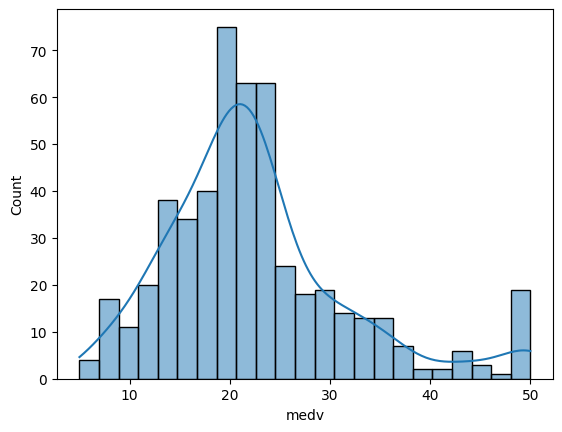

In [7]:
sns.histplot(data=dataset['medv'],kde=True)

Text(0.5, 1.0, 'Scatter plot of RM vs MEDV')

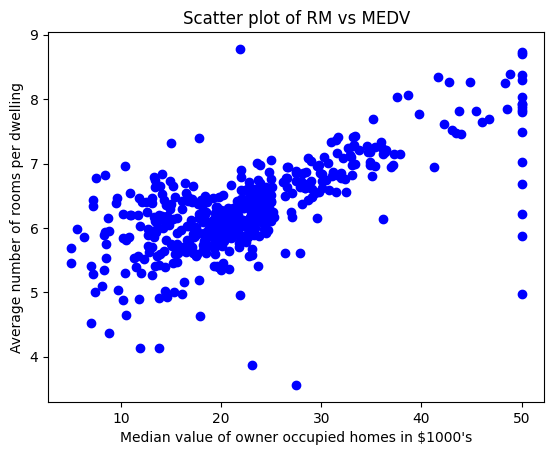

In [11]:
plt.scatter(dataset["medv"],dataset["rm"],color="blue")
plt.xlabel("Median value of owner occupied homes in $1000's")
plt.ylabel("Average number of rooms per dwelling")
plt.title("Scatter plot of RM vs MEDV")

<Axes: >

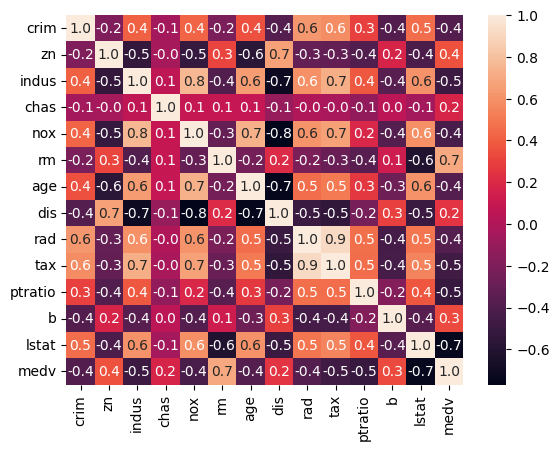

In [14]:
sns.heatmap(dataset.corr(),annot=True,fmt=".1f")

In [16]:
#Seperating dependent and independent variables
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR 
X=dataset.drop("medv",axis=1)
Y=dataset["medv"]

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [19]:
from sklearn.preprocessing import StandardScaler 
model=LR()
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)
model.fit(X_train,Y_train)

LinearRegression()

In [25]:
y_pred=model.predict(X_test)
print(y_pred)

[21.13284009 34.98130233 34.53233003 23.7577841  13.96466126 26.51772513
  9.01408972 34.02658526 13.36258963 21.41884558  4.81961134 20.14632019
 30.40127541 42.36284513 14.45194072 28.77827694 21.26245625 29.05069749
 18.84223454 30.09123503 15.7466413  20.77470477 23.03429875 27.81454697
  8.38072488 22.76635998 20.49257639 23.49111014 23.44840992 19.99957972
 23.65822634 26.72156273 27.4359125  32.61747744 23.63034975  9.95233532
 28.72067828 22.45644874 24.50041081 27.99037134 12.76893589  3.91492912
 20.58560163 26.91006955 14.40136325 20.79654187 15.28977356 14.74546169
 30.10452471 -2.72854799 31.42233536 26.45934257 24.29825234 26.39083528
 15.74405749 29.88907456 19.02098197 20.54029246 31.30494767 19.84749965
 32.96912379 20.71728235 27.68122969 10.20551543 20.95388733 21.15832616
 19.98980292 23.92719327  7.01179242 31.40321643 41.53297186 22.92245776
 21.74686438 19.09909582 19.81366125 35.32918237 23.94324373 18.64245304
 24.75645964 21.41620681 15.890475   20.89474384 31

In [24]:
print("Predicted:", y_pred[:5])
print("Actual:   ", Y_test[:5])

Predicted: [21.13284009 34.98130233 34.53233003 23.7577841  13.96466126]
Actual:    396    12.5
202    42.3
97     38.7
241    20.1
423    13.4
Name: medv, dtype: float64


In [30]:
#Evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
print("RMSE:",np.sqrt(mean_squared_error(Y_test,y_pred)))

RMSE: 4.722090276706477


In [31]:
print("R2 SCORE",r2_score(Y_test,y_pred))

R2 SCORE 0.7519350933275345
